## Análise de Dados com Python

In [32]:
#Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
#Unindo arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
#Amostra dos dados
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde
17,Salvador,2019-02-14,158.66,1037,1
86,Salvador,2019-01-01,156.47,1037,3
112,Natal,2019-01-02,43.00,1036,3
67,Fortaleza,2019-01-01,43.51,1003,1
218,Salvador,2019-01-02,189.12,1036,3
13,Aracaju,2018-01-01,43.45,1522,10


In [6]:
#Verificando tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
#Alteradno o tipo de dados da coluna LojaID
df['LojaID'] = df['LojaID'].astype("object")

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
#Consultando valores ausentes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
#Adicionando coluna Receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [12]:
#Maior Receita
df['Receita'].max()

3544.0

In [13]:
#Top 3  maiores Receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [14]:
#Top 3  piores Receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [15]:
#Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [16]:
#Ordenando saída
df.sort_values("Receita",ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [17]:
#Agrupamento por ano de receita
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [18]:
#Adicionando coluna Ano 
df['Ano_venda'] = df['Data'].dt.year

In [19]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
136,Salvador,2019-03-02,13.81,1036,1,13.81,2019
31,Natal,2018-04-03,401.00,854,4,1604.00,2018
208,Natal,2019-01-02,39.40,1036,3,118.20,2019
59,Fortaleza,2019-01-01,6.31,1002,3,18.93,2019
106,Salvador,2019-01-01,149.19,1035,2,298.38,2019
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019


In [20]:
#Adicionando coluna mês e dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [21]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
200,Salvador,2019-01-02,41.06,1035,1,41.06,2019,1,2
90,Aracaju,2018-01-01,16.27,1522,1,16.27,2018,1,1
54,Aracaju,2018-01-01,20.85,1523,1,20.85,2018,1,1
96,Recife,2019-01-01,165.36,982,7,1157.52,2019,1,1
19,Aracaju,2018-01-01,43.96,1520,9,395.64,2018,1,1
54,Natal,2018-10-03,373.00,852,4,1492.00,2018,10,3


In [22]:
#Data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [23]:
#Calculando diferença de dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [24]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
219,Salvador,2019-01-02,19.67,1037,2,39.34,2019,1,2,366 days
131,Salvador,2019-03-02,63.48,1037,3,190.44,2019,3,2,425 days
14,Aracaju,2018-01-01,148.21,1521,3,444.63,2018,1,1,0 days
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,2019,1,1,365 days
62,Natal,2018-02-10,793.00,854,4,3172.00,2018,2,10,40 days
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2019,2,13,408 days


In [25]:
#Obtendo o trimenstre da venda
df['trimestre_venda'] = df['Data'].dt.quarter

In [26]:
df.sample(6)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
77,Fortaleza,2019-01-01,167.64,1005,1,167.64,2019,1,1,365 days,1
124,Natal,2019-01-02,44.82,1034,3,134.46,2019,1,2,366 days,1
66,Recife,2019-01-01,14.59,983,7,102.13,2019,1,1,365 days,1
62,Salvador,2019-01-01,161.02,1037,3,483.06,2019,1,1,365 days,1
187,Salvador,2019-01-02,3.85,1035,3,11.55,2019,1,2,366 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,2019,3,2,425 days,1


In [27]:
#Filtrando Vendasdo ano 2019 e mês 03
filtro1 = df['Data'].dt.year == 2019
filtro2 = df['Data'].dt.month == 3
df.loc[filtro1 & filtro2]

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


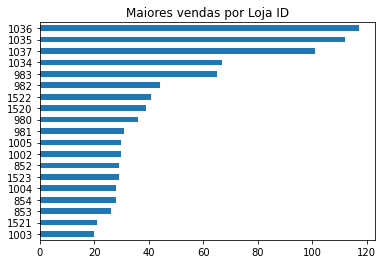

In [28]:
df['LojaID'].value_counts(ascending=True).plot.barh(title='Maiores vendas por Loja ID');

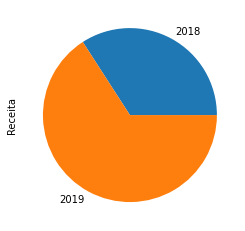

In [29]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [30]:
#Total de Vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

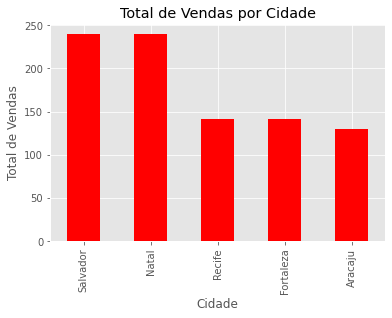

In [37]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade',color='red')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [32]:
#Alterando o estilo
plt.style.use('ggplot')

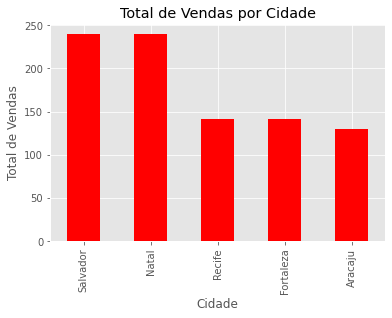

In [33]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade',color='red')
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");
plt.show()

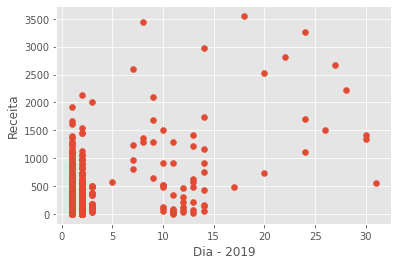

In [43]:
plt.scatter(x = df_2019['dia_venda'],y = df_2019['Receita']);
plt.xlabel("Dia - 2019")
plt.ylabel("Receita")
plt.savefig("Receita por dia.png")